<a href="https://colab.research.google.com/github/ramoants254/Car-Sale--Price-Prediction/blob/main/used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset from:https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Data Preprocessing

In [2]:
df=pd.read_csv('/content/drive/MyDrive/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
df=df.drop('Car_Name',axis=1)

In [9]:
df['Current_Year']=2024
df.head().T

,0,1,2,3,4
Year,2014,2013,2017,2011,2014
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0
Current_Year,2024,2024,2024,2024,2024


In [10]:
df['Years Old']=df['Current_Year']-df['Year']

In [11]:
df.head().T

,0,1,2,3,4
Year,2014,2013,2017,2011,2014
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0
Current_Year,2024,2024,2024,2024,2024
Years Old,10,11,7,13,10


In [12]:
df=df.drop(columns=['Current_Year','Year'])

In [13]:
df.head().T

,0,1,2,3,4
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0
Years Old,10,11,7,13,10


In [14]:
df=pd.get_dummies(data=df,drop_first=True)

In [15]:
df.shape

(301, 9)

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


## Correlation Matrix

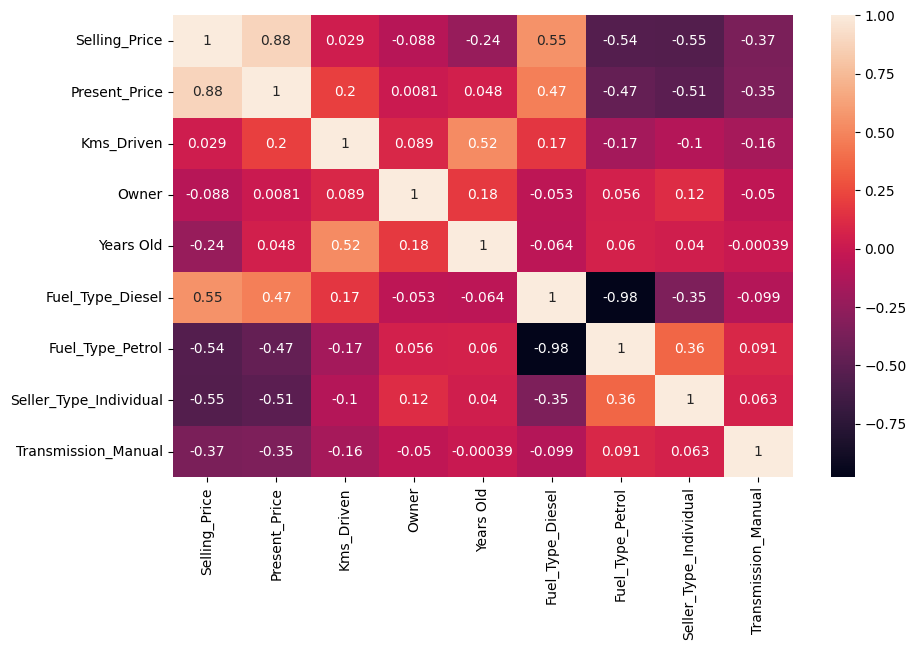

In [17]:
corr=df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()


In [18]:
df2=df.drop('Selling_Price',axis=1)

<Axes: title={'center': 'Correlation with Selling Price'}>

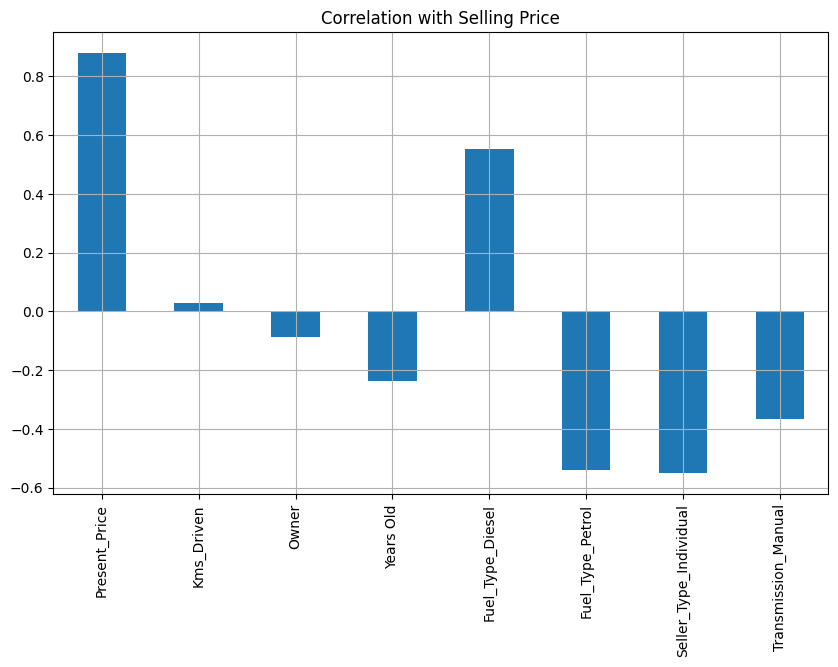

In [19]:
df2.corrwith(df.Selling_Price).plot.bar(figsize=(10,6),title="Correlation with Selling Price",grid=True)

## Feature Scaling

In [20]:
# sc=StandardScaler()
# sc.fit_transform(df)

# Spliting the Dataset

In [21]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Selecting the Right Model

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.8494082470697554

In [26]:
# Random Forest Model
model2=RandomForestRegressor()

In [27]:
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [28]:
r2_score(y_test,y_pred)

0.9718353062324804

## Tuning the Hyperparameters

In [37]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [38]:
rs=RandomizedSearchCV(estimator=model2
                      , param_distributions=parameters,
                      n_iter=100,
                      cv=3,
                      verbose=2,
                      random_state=42,
                      n_jobs=-1)

In [39]:
rs.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [40]:
rs.best_score_

0.891260941170315

In [41]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [42]:
r2_score(y_test,y_pred)

0.9718353062324804

In [44]:
model2 = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    max_depth=20,
    bootstrap=True
)


In [45]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [46]:
r2_score(y_test,y_pred)

0.8494082470697554

## Prediction

In [35]:
single_row=[[8.54,3500,0,5,1,0,0,1]]

In [36]:
model2.predict(single_row)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.9675])